# Unsupervised Learning Solution
### EDSA - Movie Recommendation 2022 
#### AI Incorporated - Team 4 EDSA

© Explore Data Science Academy

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fbca114f2e4f6b9b46f2cc76527d7401e%2FImage_header.png?generation=1593773828621598&alt=media" width=100%/> 

<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>

    1.1 Overview
    1.2 Problem Statement
    1.3 Model Versioning with COMET
    1.4 Required Installations
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Collect Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
    4.1 

<a href=#five>5. Data Processing</a>
    
    5.1 

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Modelling</a>
    
    7.1 

<a href=#eight>8. Model Performance</a>
    
    8.1 

<a href=#nine>9. Saving & Exporting Model</a>
    
    9.1 Export Test Prediction as CSV
    9.2 Log to Comet

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>

<a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

#### 1.1 Overview

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

Hence, We will be constructing a recommendation algorithm based on `Content` and `Collaborative` filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

<img src="https://miro.medium.com/max/1400/1*odvftNNQJp3O6vpwmZsJOQ.png" width=100%/> 

#### 1.2 Problem Statement

YouTube, FaceBook, Twitter, NetFlix, Amazon, Linkedin, Google are all leading businessess in the world today and all this gaints all have one thing in common, YES!!!, you got it; a recommendation machine. In this era of Artifical Intelligence, Everthing from the Government to Education down to the ever growing entertainment industry are so interconnected and now realies heavily on AI technology to boost their Efficiency. 

Hence, we will be building an accurate and robust model to this challenge of immense economic potential, with users of our clients system being able to recieving personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

#### 1.3 Model Versioning with COMET

To Begin with, We will be using Comet, a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing us to reproduce your results, or go back to a previous version of our experiment.

In [1]:
# Install Comet
!pip install comet_ml

In [2]:
# Import Comet package
from comet_ml import Experiment

# Setting the API key

# experiment = Experiment(
#     api_key="__________",
#     project_name="____________",
#     workspace="________",
# )

####  1.4 Required Installations

In [3]:
!pip install surprise

#### 1.5 Our Approach

Recommender systems encompass a class of techniques and algorithms that can suggest 'relevant' items to users, in this case, movies. They pedict future behaviour based on past data and a combination of multiple algorithms.

We will commence by builing;

* a `Simple Recommender` Model which basically recommends movies base on their `Ratings` against `Users`. It's limitation is that its recommendation personified as the same thing is recomended to everybody and then we proceed to

* a `Content-Based Recommendation System` which basically does the same thing that the simple recommeder does but further considers as the name says, the `Item Contents` (Tags, Keyword, Cast, Genre, the nitigrities etc) of each item. But this too can enhanced towards adobting 

* a `Collaborative Filtering Recommendation Systems` which harness all `Past data` of user interactions with the movies they have watch and ratings they have made both directly (actually rating the movie) or indirectly (i.e how long they dwelled on the movie).


All this models suffers from what is known as `COLD START PROBLEMS`. It's only normal to get new subscribers to your business and lack history to what is to be recommended. We could reduce that global scope to;
        - The Location, Age, Gender, and User devices and
        - Latest trending Cast, Crew, Genre to recommend to Target

So, Let's Proceed

<a id="two"></a>
## 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

**SEE** in-line comments BELOW for purpose per importation.

In [4]:
""" 
For a seamless run, 
All required libraries will be imported here. 
"""

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # <-- for loading CSV data
import numpy as np                                                    # <-- Used for mathematical operations
import matplotlib.pyplot as plt                                       # <-- for Graphical Representation                                                 
import seaborn as sns                                                 # <-- for specialized plots                                                         
import scipy as sp                                                    # <-- Used in our code for numerical efficientcy. 
sns.set()                                                             # <-- set plot style

# Libraries for data preparation
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet

# Libraries for featurization and similarity computation
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for Model Building
import surprise
from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# Libraries used during sorting procedures.
import operator                                                       # <-- Convienient item retrieval during iteration 
import heapq                                                          # <-- Efficient sorting of large lists

# Libraries for calculating performance metrics
import time
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise import accuracy

# Libraries to Save/Restore Models
import pickle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

<a id="three"></a>
## 3. Collect Data
<a href=#cont>Back to Table of Contents</a>

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

We'll be using this special version of the MovieLens dataset which is enriched with additional data, and resampled for fair evaluation purposes.

**Source**

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

**Supplied Files**

* `genome_scores.csv` - a score mapping the strength between movies and tag-related properties.
* `genome_tags.csv` - user assigned tags for genome-related scores
* `imdb_data.csv` - Additional movie metadata scraped from IMDB using the links.csv file.
* `links.csv` - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* `sample_submission.csv` - Sample of the submission format for the hackathon.
* `tags.csv` - User assigned for the movies within the dataset.
* `test.csv` - The test split of the dataset. Contains user and movie IDs with no rating data.
* `train.csv` - The training split of the dataset. Contains user and movie IDs with associated rating data.

Kindly Make Reference to [Kaggle](https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/data) for More Information asa concern the data.

In [5]:
#Kaggle setup
! pip install -q kaggle

from google.colab import  files
files.upload()

#Create Kaggle Folder
!mkdir ~/.kaggle
#Copy Kaggle.json file to new folder
! cp kaggle.json ~/.kaggle/
#Grant Permissions
! chmod 600  ~/.kaggle/kaggle.json
#Datasets List
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            278        334  0.9375           
datasets/piterfm/2022-ukraine-russian-war                                      2022 Ukraine Russia War                            2KB  2022-04-24 10:24:15          10965        603  1.0              
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           1

In [6]:
#Download dataset
! kaggle competitions download -c edsa-movie-recommendation-2022

#Unzip datasets
! mkdir datasets
!unzip  edsa-movie-recommendation-2022.zip

 91% 218M/239M [00:02<00:00, 91.8MB/s]
100% 239M/239M [00:02<00:00, 90.2MB/s]
Archive:  edsa-movie-recommendation-2022.zip
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: imdb_data.csv           
  inflating: links.csv               
  inflating: movies.csv              
  inflating: sample_submission.csv   
  inflating: tags.csv                
  inflating: test.csv                
  inflating: train.csv               


In [7]:
# Load Base Train & Test Data locally
# train_df = pd.read_csv(r'.\edsa-movie-recommendation-2022\train.csv')
# test_df = pd.read_csv(r'.\edsa-movie-recommendation-2022\test.csv')

# From Kaggle
train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

In [8]:
# Load Meta Data locally
# genome_scores_df = pd.read_csv('.\edsa-movie-recommendation-2022\genome_scores.csv')
# genome_tags_df = pd.read_csv('.\edsa-movie-recommendation-2022\genome_tags.csv')
# imdb_data_df = pd.read_csv('.\edsa-movie-recommendation-2022\imdb_data.csv')
# links_df = pd.read_csv('.\edsa-movie-recommendation-2022\links.csv')
# movies_df = pd.read_csv('.\edsa-movie-recommendation-2022\movies.csv')
# tags_df = pd.read_csv(r'.\edsa-movie-recommendation-2022\tags.csv')

# from Kaggle
genome_scores_df = pd.read_csv('genome_scores.csv')
genome_tags_df = pd.read_csv('genome_tags.csv')
imdb_data_df = pd.read_csv('imdb_data.csv')
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv(r'tags.csv')

In [9]:
# Load Submission Format
# sample_submission_df = pd.read_csv(r'.\edsa-movie-recommendation-2022\sample_submission.csv')

# From Kaggle
sample_submission_df = pd.read_csv(r'sample_submission.csv')
sample_submission_df.head(2)

,Id,rating
0,1_2011,1.0
1,1_4144,1.0


<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

This includes looking to understand patterns in our data, pinpoint any outliers and indicate relationships between variables. This phase we will be carrying out some data analysis, descriptive statistics and data visualisations, all in the bid to understand to properly fine refining the data in the feature engineering in preparation for modeling. 

##### 4.1 Review Loaded Data

This first and the most important step in this project as a proper understanding on the data available will increase the chances of what we can do with it.

In [10]:
# Review Base data
print('Number of Ratings in our TRAIN Dataset', train_df.shape)
print('Number of Ratings in our TEST Dataset', test_df.shape)
train_df.head()

Number of Ratings in our TRAIN Dataset (10000038, 4)
Number of Ratings in our TEST Dataset (5000019, 2)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [11]:
# Review Submission format
sample_submission_df.head(2)

,Id,rating
0,1_2011,1.0
1,1_4144,1.0


First we can acknowledge here that the most basic model we could build will be one recommending a Movie, represented by it's unique Movie_ID according to it's Rating. Every other modelling such as recommending based on movie Content or on a more collaborative scale, will be to improve this Model.
We Also have Available a wooping `10million plus` observations for training & validation, and also `5Million plus` Test dataset to act as Unseen/Real world Test case.

Average rating in dataset: 3.5333951730983424


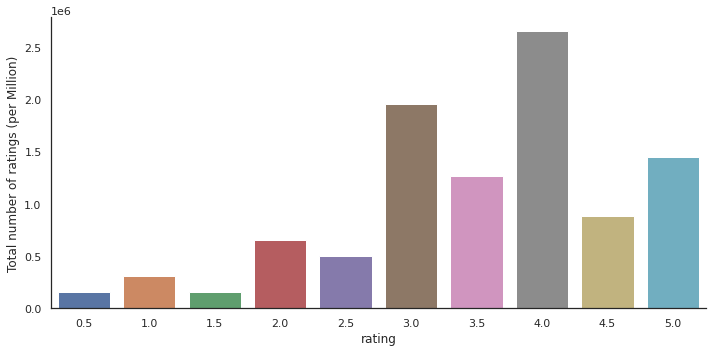

In [12]:
# Let's Visualise the Distribution of our Observation based on Rating
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train_df, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings (per Million)")
print (f'Average rating in dataset: {np.mean(train_df["rating"])}')

As we can see, majority of our Observations falls within the range of 3.0 to 5.0 with 4.0 as the highest with over 2.6Million observations. This means that modelling by rating alone will not be entirely representative of what the viewer may want since majority of ratings fall within the higher rates. Movie Contents/Types, User Preferences and other collaborative options, will have to be called into actions as distinguishing factor to tailoring down a recommendation to a user, which is what we want.

Now; Let's Review our additional metadata set to see if we see more distinguisable features worthy of extraction, to be used to improving our model.

In [13]:
# Genome Score Review: 
'''a score mapping the strength between movies and tag-related properties.'''

print('Shape: ', genome_scores_df.shape)
print('No. of Unique Tag_Id: ', len(pd.unique(genome_scores_df['tagId'])))
genome_scores_df.head(3)

Shape:  (15584448, 3)
No. of Unique Tag_Id:  1128


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250


We have 1128 Distinct `Tag_ID` being having varying relevance score per each 15 million viewed Movies with their movie_ID

**Hence:** We will pick the mean `Relevance` Column per movieId to left join it to our training dataset using movieID as our Key. SEE DATA PROCESSING

In [14]:
# IMDB Data Review: 
'''an additional movie metadata scraped from IMDB using the links.csv file.'''

print('Shape: ', imdb_data_df.shape)
imdb_data_df.head(3)

Shape:  (27278, 6)


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry


As we can see, People/Users may tend to watch movies based on their `CAST` or `Director` but predominately the CAST and most people may be drawn to more `fight` oriented movies than `cowboy` or `animation`.

Hence: We will pick the `Title_cast` & `plot_keywords` Columns as potential features

In [15]:
# MOVIES Table Review: 
'''Gives each movie primary describtion'''

print('Shape: ', movies_df.shape)
print('No. of Unique Movie_Id: ', len(pd.unique(movies_df['movieId'])))
movies_df.head(3)

Shape:  (62423, 3)
No. of Unique Movie_Id:  62423


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


Obviously the `Movie_ID column` is very important and also the `genres`; Viewers might be more interested in `Comedy` and not recommending movies having `ROMANCE` as a genre to CHILDREN. We could be sued. In Total we have availble over `62 thousand` distinct movies available for our training.

In [16]:
# TAG Review: 
'''User assigned for the movies within the dataset'''

print('Shape: ', tags_df.shape)
tags_df.head(3)

Shape:  (1093360, 4)


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598


The `Timestamp` might prove important as varying individuals will tend to view certain `tag` of movies at unique times and as such we should have our model providing recommendation to suit the TIMING (Think of HORROR movies and Night-times). This table may be having good info that could positively influence our training model

That been said, Let's go into more statistical Review of our Dataset.
#### 4.2 Descriptive Stats

In [17]:
# Info on Base train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


We can see the columns and the data type storage format and as spotted, If we are to use the `Timestamp` it has to be changed from `int` to `DateTime` for it to make sense to our model, if not, the model will just see them as mere integers/numbers.

In [18]:
# Overview of data
round(train_df['rating'].describe(), 1)

count    10000038.0
mean            3.5
std             1.1
min             0.5
25%             3.0
50%             3.5
75%             4.0
max             5.0
Name: rating, dtype: float64

We can see a Maximum of 25% of our viewers will tend to rate movies below 3.0

Now, Let's get into the meat of processing our available. keep in mind, All things are possible here.

<a id="five"></a>
## 5. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>

The primary funtion of data processing is to provide Cleaner, Functional, higher-quality data, which is key to any successesful of data engineering and model building. It also enable more valuable insights to be extracted as well. Hence, Let's get digging.

In [19]:
base_df = train_df[['userId', 'movieId', 'rating']]
base_df.head(2)

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5


In [20]:
'''
Confirming READINESS for application of our Base Training Data having
Only Two Non-null labels and one Target variable (RATINGS).
'''
base_df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

NEXT; Let's merge all relevant features to one dataframe, to serve as an upgraded version of our Base_df

In [57]:
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [21]:
# From genome_scores, groupby movieId with the corresponding mean RELEVANCE
gf = genome_scores_df.groupby(['movieId'])['relevance'].mean().reset_index()
gf.head()

,movieId,relevance
0,1,0.163382
1,2,0.122205
2,3,0.092110
3,4,0.087318
4,5,0.093966


In [22]:
# Merging the train & genome_scores to get relevance score  based on unique movieId                
updated_df = pd.merge(train_df, gf, how ='left', on ='movieId').fillna(gf['relevance'].mean())
updated_df.head()

,userId,movieId,rating,timestamp,relevance
0,5163,57669,4.0,1518349992,0.189406
1,106343,5,4.5,1206238739,0.093966
2,146790,5459,5.0,1076215539,0.109958
3,106362,32296,2.0,1423042565,0.079232
4,9041,366,3.0,833375837,0.090297


In [23]:
# NEXT: We Merge the Updated_df & Movies Table to get GENRE         
updated_df = pd.merge(updated_df, movies_df[['movieId', 'genres']], how ='left', on ='movieId')
updated_df.head()

,userId,movieId,rating,timestamp,relevance,genres
0,5163,57669,4.0,1518349992,0.189406,Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,0.093966,Comedy
2,146790,5459,5.0,1076215539,0.109958,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,0.079232,Adventure|Comedy|Crime
4,9041,366,3.0,833375837,0.090297,Drama|Horror|Mystery|Thriller


In [24]:
"""Now we are making progress"""
# NEXT: we merge the CAST and Plot-Keywords into our Updated Dataframe.               
updated_df = pd.merge(updated_df, imdb_data_df[['movieId', 'title_cast', 'plot_keywords']], how ='left', on ='movieId')
updated_df.head(10)

,userId,movieId,rating,timestamp,relevance,genres,title_cast,plot_keywords
0,5163,57669,4.0,1518349992,0.189406,Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,0.093966,Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,fatherhood|doberman|dog|mansion
2,146790,5459,5.0,1076215539,0.109958,Action|Comedy|Sci-Fi,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,lingerie|michael jackson character|shorthaired...
3,106362,32296,2.0,1423042565,0.079232,Adventure|Comedy|Crime,Sandra Bullock|Regina King|Enrique Murciano|Wi...,female protagonist|cleave gag|good woman|fbi
4,9041,366,3.0,833375837,0.090297,Drama|Horror|Mystery|Thriller,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,freddy krueger|elm street|famous director as h...
5,120949,81768,3.0,1289595242,0.116368,Comedy|Fantasy,NaN,NaN
6,19630,62049,4.0,1246729817,0.159134,Drama|Sci-Fi,NaN,NaN
7,21066,2282,1.0,945785907,0.098109,Comedy|Drama,Edward Furlong|Christina Ricci|Bess Armstrong|...,sex|teenage girl|art|new york city
8,117563,120474,4.0,1515108225,0.115350,Animation|Children,Tom Hanks|Tim Allen|Kristen Schaal|Kevin McKid...,toy story|woody character|buzz lightyear chara...
9,144018,1997,5.0,1109967647,0.161392,Horror|Mystery,NaN,NaN


Now we have some cleaning to do.

In [25]:
# Convert TimeStamp to DateTime
updated_df['timestamp']=pd.to_datetime(updated_df['timestamp'])
# Check
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   userId         int64         
 1   movieId        int64         
 2   rating         float64       
 3   timestamp      datetime64[ns]
 4   relevance      float64       
 5   genres         object        
 6   title_cast     object        
 7   plot_keywords  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 686.6+ MB


In [26]:
### Split & String data in Columns(title_cast, genres, plot_keywords)
# updated_df[['genres','title_cast','plot_keywords']] = updated_df[['genres','title_cast','plot_keywords']].agg(lambda x: x.split().replace('|',','), axis=1)

In [27]:
### Put title_cast, genres, plot_keywords into ONE COlUMN(Token)


In [28]:
### Tokenize Token column


In [29]:
# # Next create a set of dictionaries, one for each of the RATING Types.
# type_labels = list(updated_df.rating.unique())
# rating = {}
# for pp in type_labels:
#     df = updated_df.groupby('rating')
#     rating[pp] = {}
#     for row in df.get_group(pp)['tokens']: ################################################################# <------------
#         rating[pp] = bag_of_words_count(row, rating[pp])   
        
# # Next, we create a list of all of the unique words.
# all_words = set()
# for pp in type_labels:
#     for word in rating[pp]:
#         all_words.add(word)
        
# # create a combined bag of words dictionary
# rating['all'] = {}
# for pp in type_labels:    
#     for word in all_words:
#         if word in rating[pp].keys():
#             if word in rating['all']:
#                 rating['all'][word] += rating[pp][word]
#             else:
#                 rating['all'][word] = rating[pp][word]

For Observations with NAN in the title_cast, plot_keywords columns, we will leave it as effect may not be visible

In [30]:
# from PIL import Image
# from wordcloud import WordCloud 

# # RUN WORDCLOUD
# rating2_5 = WordCloud(width = 1000, height = 500).generate_from_frequencies(rating[2.5])
# rating_3 = WordCloud(width = 1000, height = 500).generate_from_frequencies(rating[3.0])
# rating3_5 = WordCloud(width = 1000, height = 500).generate_from_frequencies(rating[3.5])
# rating_4 = WordCloud(width = 1000, height = 500).generate_from_frequencies(rating[4.0])
# rating4_5 = WordCloud(width = 1000, height = 500).generate_from_frequencies(rating[4.5])
# rating_5 = WordCloud(width = 1000, height = 500).generate_from_frequencies(rating[5.0])

# #Create a canvas
# fig = plt.figure(figsize=(15,8))
# # setting values to rows and column variables
# rows = 2
# columns = 3

# # Adds a subplot at the 1st position
# fig.add_subplot(rows, columns, 1)
# # showing image
# plt.imshow(rating2_5)
# plt.axis('off')
# plt.title("Word Map of Movies Rated 2.5")
  
# # Adds a subplot at the 2nd position
# fig.add_subplot(rows, columns, 2)
# # showing image
# plt.imshow(rating_3)
# plt.axis('off')
# plt.title("Word Map of Movies Rated 3.0")

# # Adds a subplot at the 3rd position
# fig.add_subplot(rows, columns, 3)
# # showing image
# plt.imshow(rating3_5)
# plt.axis('off')
# plt.title("Word Map of Movies Rated 3.5")

# # Adds a subplot at the 4th position
# fig.add_subplot(rows, columns, 4)
# # showing image
# plt.imshow(rating_4)
# plt.axis('off')
# plt.title("Word Map of Movies Rated 4.0")

# # Adds a subplot at the 4th position
# fig.add_subplot(rows, columns, 5)
# # showing image
# plt.imshow(rating4_5)
# plt.axis('off')
# plt.title("Word Map of Movies Rated 4.5")

# # Adds a subplot at the 4th position
# fig.add_subplot(rows, columns, 6)
# # showing image
# plt.imshow(rating_5)
# plt.axis('off')
# plt.title("Word Map of Movies Rated 5.0")

<a id="six"></a>
## 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

Here we will be carrying out certaing operations ranging from `Dimensionality Reduction` to ascertain the funtionality/Effect of ur added features, riding outliers, and generally making ready our data to serves our modelling.

<a id="seven"></a>
## 7. Modeling
<a href=#cont>Back to Table of Contents</a>


#### 7.1 A Simple Recommender

We wil be adopting the most basic class towards collaborative recommendation which the `Matrix Factorization-Based Algorithm.`. This works by decomposing the user-movie (userId-movieId) interaction matrix into the product of two lower dimensionality rectangular matrices. 

To implement this, we will be adopting the `surprise library`, which is for building and testing recommender systems and feeding it with our NON-NULL Base_data. so let's get right into it. 

In [31]:
# We split our Dataset to enable us validate here after modeling.

print('initial shape of TRAIN: ', base_df.shape)
train_data = base_df.iloc[:int(base_df.shape[0]*1.0)]
val_data = base_df.iloc[int(test_df.shape[0]*0.95):]
print('Final shape of TRAIN Dataset: ', train_data.shape)
print('Final shape of Validation Dataset: ', val_data.shape)

initial shape of TRAIN:  (10000038, 3)
Final shape of TRAIN Dataset:  (10000038, 3)
Final shape of Validation Dataset:  (5250020, 3)


So we have for Train `9Million+` observation from the `10Million` and finally the remaining `1milion` as validation piece.

In [32]:
'''Modelling: Recall, We've imported SURPRISE at our Import section '''

# This is to specify how to read the data frame.
reader = Reader(rating_scale=(train_data['rating'].min(), train_data['rating'].max()))     # i.e 0.5 & 5 Respectively; SEE EDA

# This creates the train-data from our dataframe
train_data_sup = Dataset.load_from_df(train_data, reader)

In [33]:
'''To Ascertain Most suiting Model to be Adopted'''

# benchmark = []
# # Iterate over all algorithms

# algorithms = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

# print ("Attempting: ", str(algorithms), '\n\n\n')

# for algorithm in algorithms:
#     print("Starting: " ,str(algorithm))
#     # Perform cross validation
#     results = cross_validate(algorithm, train_data_sup, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
#     # Get results & append algorithm name
#     tmp = pd.DataFrame.from_dict(results).mean(axis=0)
#     tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
#     benchmark.append(tmp)
#     print("Done: " ,str(algorithm), "\n\n")

# print ('\n\tDONE\n')

'To Ascertain Most suiting Model to be Adopted'

In [34]:
# Release Result
# surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
# surprise_results

In [35]:
# build the train set from traindata. 
trainset = train_data_sup.build_full_trainset()                    # <--- It is of dataset format from surprise library

In [ ]:
# Set Baised Parameters Model and Fit it.
'''
NOTE: SVD, When its Baseline Unbaised parameters are not set,
      It's equivalent to Probablistic Matrix Factorization
'''
svd = SVD(n_epochs=20, n_factors=100, biased=True, random_state=15, verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11


<a id="eight"></a>
## 8. MODEL PERFORMANCE
<a href=#cont>Back to Table of Contents</a>

Here will be reviewing the individual performance of our machine learning model and why to use one in place of the other

#### 8.1 Testing Simple Recommender


In [ ]:
# Cross validating using our 
from surprise.model_selection import cross_validate
result = cross_validate(svd, Dataset.load_from_df(val_data, reader), measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22


In [42]:
result = pd.DataFrame(result)
result

,test_rmse,test_mae,fit_time,test_time
0,0.904949,0.690440,575.975886,36.962213
1,0.905572,0.691045,580.685097,33.860709
2,0.904921,0.690739,584.541172,36.317919


In [ ]:
# Creating a sparse matrix
# train_sparse_matrix = sparse.csr_matrix((train_data.rating.values, (train_data.userId.values,
#                                                train_data.movieId.values)))

#### 8.2 Best Model Resolution

From the Result we can conclusively say ..............

#### 8.3 Hypertune Best Model

For every model, our goal is to minimize the error or say to have classification or predictions as close as possible to actual values. This is one of the cores or say the major objective of hyperparameter tuning. 

In [52]:
# smaller grid for testing
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_epochs": [20],
#     "lr_all": [0.002, 0.005],
#     "reg_all": [0.02],
#     "n_factors": [100], 
#     "biased": [True], 
#     "random_state": [10, 15, 30, 42], 
#     "verbose": [True]
# }
# gs = GridSearchCV(SVD, param_grid, scoring=['accuracy', 'f1'], refit=False, cv=3)

# gs.fit(train_data_sup)

# training_parameters = gs.best_params["rmse"]
# print('Best Parameters', training_parameters)

In [54]:
# # Best Model Score in %
# print("BEST RMSE: \t", gs.best_score["rmse"])
# print("BEST MAE: \t", gs.best_score["mae"])
# print("BEST params: \t", gs.best_params["rmse"])

#### 8.4 Best Model Visual Evaluation
Measuring the effectiveness and performance is what exactly the confusion matrix is design to do. So we will be putting this up bot in Numbers and visuals.

As you can see above........

<a id="nine"></a>
## 9. SAVING & EXPORTING MODEL
<a href=#cont>Back to Table of Contents</a>

Now, we don't want our models just be sitting in some jupyter notebook, at this point, Let's save results to desired format, preferrably CSV and model as a pickle file. This will be used for deployment purposes to solving real life scenerios.

#### 9.1 Export Test Prediction as CSV

In [55]:
'''
Unhash to Run  (CTRL + /)
'''
# Create Kaggle submission file

predictions = []
for i, row in test_df.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test_df['Id'] = test_df['userId'].map(str) +'_'+ test_df['movieId'].map(str)
results = pd.DataFrame({"Id":test_df['Id'],"rating": predictions})
# Saves as CSV 
results.to_csv("T4_submission_3.csv", index=False)

In [56]:
# Use to Extract CSV file when running on G-Colab

from google.colab import  files
files.download('T4_submission_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## SAVING TRAINED MODEL
# from surprise import dump
# import os

# model_filename = "./EDSA_T4_Simple_Recommender_1.pkl"
# print (">> Starting dump")
# # Dump algorithm and reload it.
# file_name = os.path.expanduser(model_filename)
# dump.dump(file_name, algo=svd)
# print (">> Dump done")
# print(model_filename)

#### 9.2 Log to Comet

In [ ]:
# Create dictionaries for the data we want to log
# This had to be defined since that applied to our model is the best from the grid search.

# params ={"random_state": 42,
#          "model_type ": "SVD",
#          "Best Parameters": training_parameters
#         }

# best_metrics ={"BEST RMSE" : gs.best_score["rmse"],)
#               "BEST MAE": gs.best_score["mae"]),
#                "BEST params" gs.best_params["rmse"]}


In [ ]:
#log parameters and results
# experiment.log_parameters(params)
# experiment.log_metrics(best_metrics)
# experiment.log_notebook('5.0 Advance_Classification_Notebook.ipynb', overwrite=False)

NOTE: It is required If using comet within a jupyter notebook, to end our experiment on completion as illustrated below.

In [ ]:
# STRICTLY FOR LOCAL JUPYTER NOTEBOOKS
# experiment.end()

Kindly [Go to Streamlite Webpage](http://) to test-run an actual perfromance of our model on the web.

<a id="ten"></a>
## 10. Conclusion
<a href=#cont>Back to Table of Contents</a>

   In summary .......

<a id="eleven"></a>
## 11. Recommendation
<a href=#cont>Back to Table of Contents</a>

.......

<a id="ref"></a>
## Reference Links
<a href=#cont>Back to Table of Contents</a>

* [EXPLORE Data Science Academy Resources](https://explore-datascience.net/)
* [GitHub Collab Ref.](https://github.com/)
* [Commet Collab Ref](https://www.comet.ml/) 
* [Kaggle Collab Ref](https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/overview)
* [How to Build a Movie Recommendation System by Ramya Vidiyala](https://towardsdatascience.com/how-to-build-a-movie-recommendation-system-67e321339109)